In [229]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [230]:
#read in csv files
df_W = pd.read_csv("final_weather.csv")
df_311 = pd.read_csv("final_311.csv")

#Fix Column names to do an inner join
df_311.rename(columns={"Date" : "date"}, inplace = True)
df_311.rename(columns={"Zip Codes" : "Zip_Codes"}, inplace = True)

#Combine files using pandas merge:
df = pd.merge(df_W, df_311, on = "date", how = "inner")
print(df.columns)

#Clean data for X variable for LR model
df_X = df[["Unique Key", "date", "Zip_Codes", "average temperature", "precipitation", "snow fall", "snow depth"]].replace('T', 0.00)
df_X[["average temperature", "precipitation", "snow fall", "snow depth"]] = df_X[["average temperature", "precipitation", "snow fall", "snow depth"]].astype(float)

Index(['Unnamed: 0_x', 'date', 'maximum temperature', 'minimum temperature',
       'average temperature', 'precipitation', 'snow fall', 'snow depth',
       'Unnamed: 0_y', 'Unique Key', 'Complaint Type', 'Descriptor',
       'Location Type', 'Zip_Codes', 'Time'],
      dtype='object')


In [231]:
#Get the count of the number of 311 calls per day.
count_311 = df.groupby("date", as_index = False)["Unique Key"].count()

#Make sure rows match
mean_weather = df_X.groupby("date", as_index=False)[["Zip_Codes", "average temperature", "precipitation", "snow fall", "snow depth"]].mean()
#print(mean_weather)

#Linear Regression Model Set Up

#This is to clean the data before running the LR Model. It shortens X to have the same number of rows as Y.
X = mean_weather[["average temperature", "precipitation", "snow fall", "snow depth"]]
Y = count_311["Unique Key"]

# Split train and test data
X_train, X_Test, y_train, y_test = df_linearRegression = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

dependentVar = model.predict(X)
#print(dependentVar)

Index(['date', 'Zip_Codes', 'average temperature', 'precipitation',
       'snow fall', 'snow depth', 'Unique Key'],
      dtype='object')


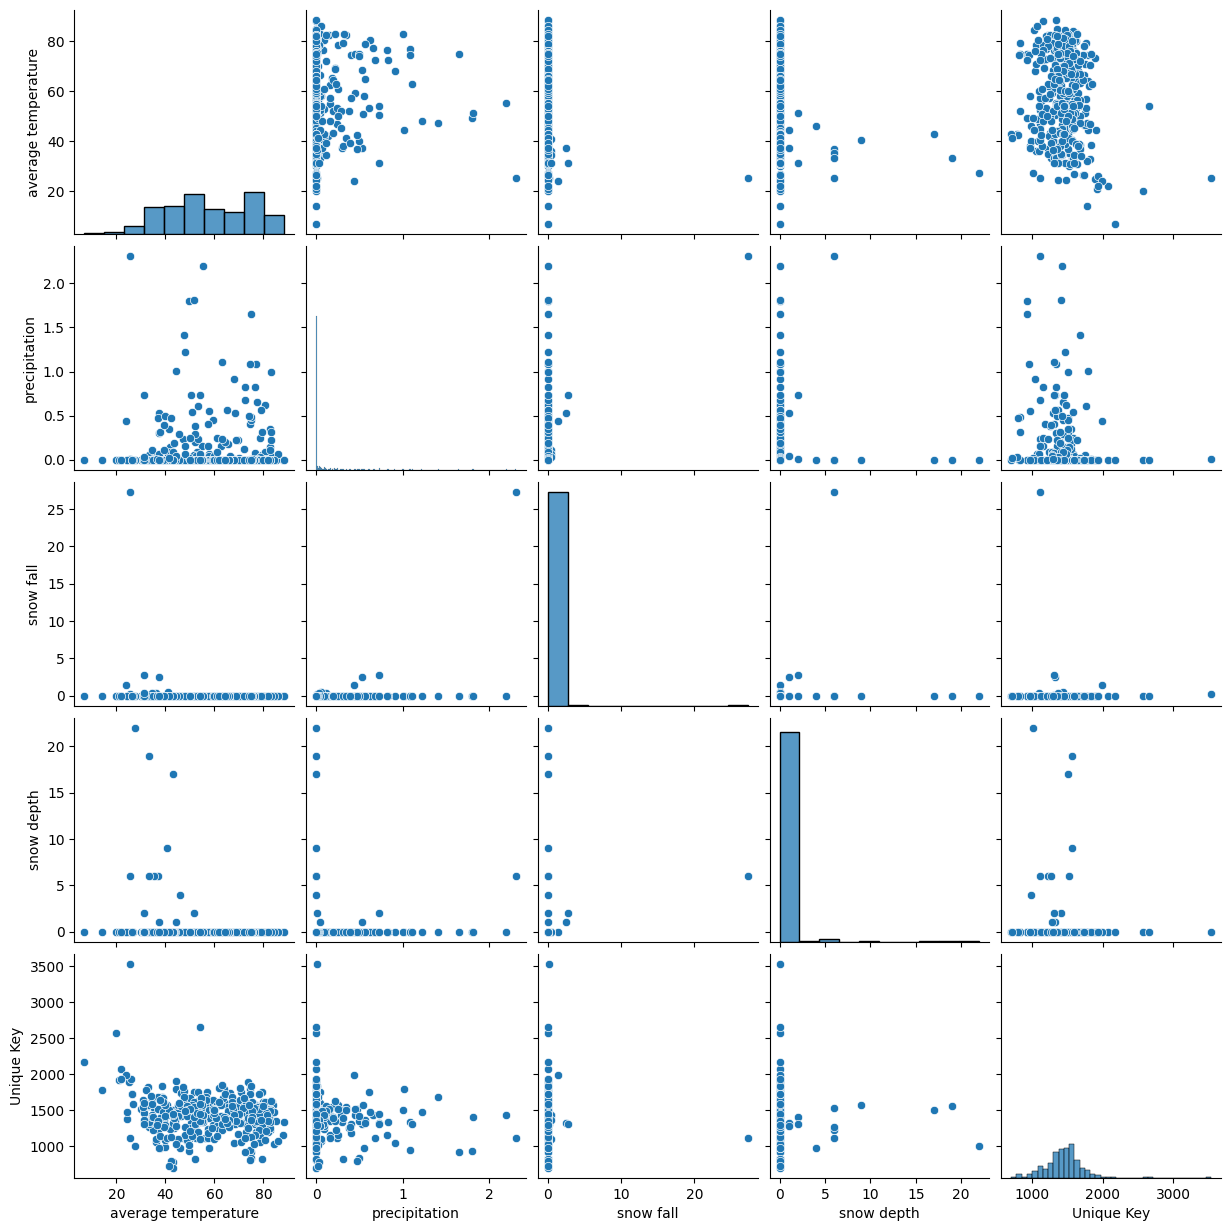

In [232]:
#Compare Coefficients
df_pair = pd.merge(mean_weather, count_311[['date', 'Unique Key']], on='date', how='inner')
print(df_pair.columns)
sns.pairplot(df_pair.drop(columns=["Zip_Codes"]))

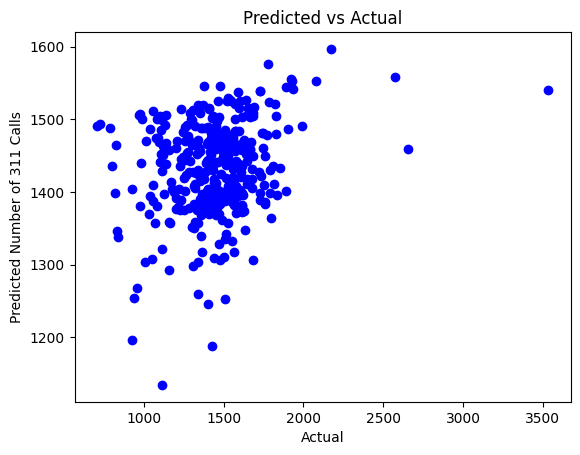

In [233]:
#Visual of Predicted vs actual values
plt.scatter(Y, dependentVar, color = "blue")

plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted Number of 311 Calls")

#plt.legend()
plt.show()

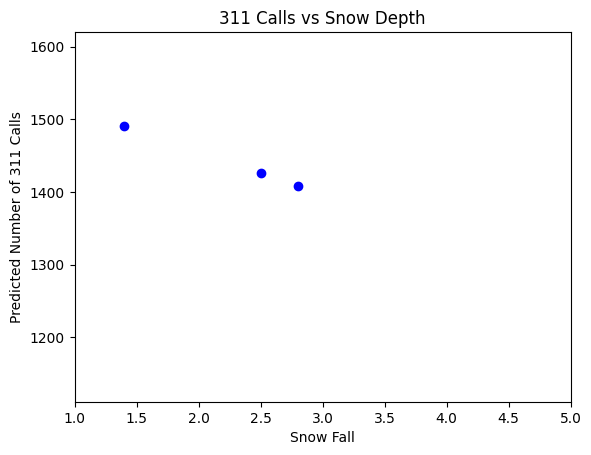

In [234]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["snow fall"], dependentVar, color = "blue")
plt.xlim(1, 5)
plt.title("311 Calls vs Snow Depth")
plt.xlabel("Snow Fall")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

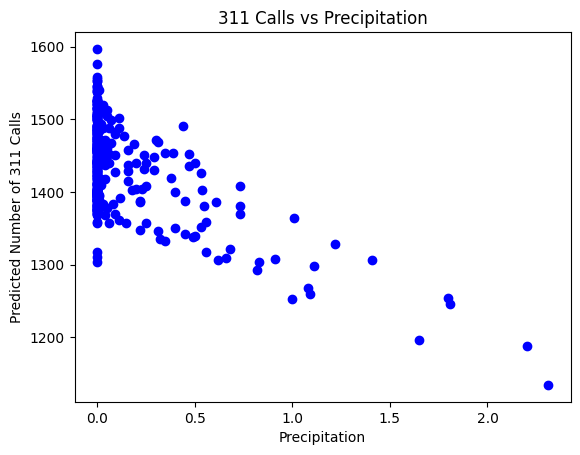

In [235]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["precipitation"], dependentVar, color = "blue")
#plt.xlim(1, 30)
plt.title("311 Calls vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

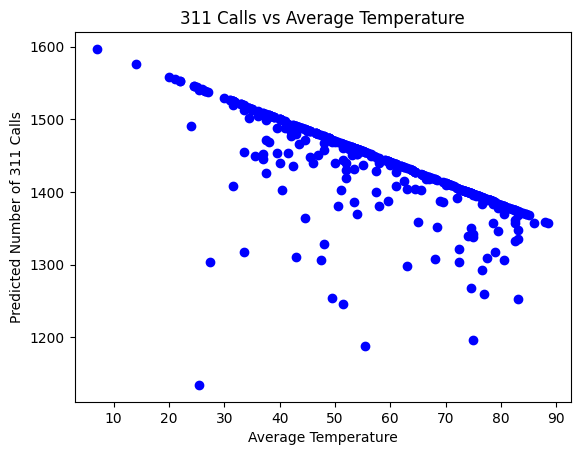

In [236]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["average temperature"], dependentVar, color = "blue")

plt.title("311 Calls vs Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

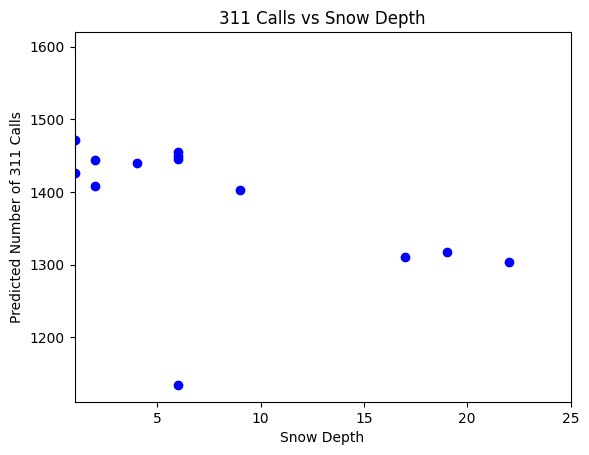

In [237]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["snow depth"], dependentVar, color = "blue")
plt.xlim(1, 25)
plt.title("311 Calls vs Snow Depth")
plt.xlabel("Snow Depth")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

In [238]:
#From: https://data.ny.gov/Government-Finance/New-York-State-ZIP-Codes-County-FIPS-Cross-Referen/juva-r6g2 
df_NY_County = pd.read_csv("final_NYZipCode.csv")

In [239]:
#Makes dictionary of corresponding zip codes for every county in NY
county = {}
for c, z in zip(df_NY_County["County Name"], df_NY_County["ZIP Code"]):
    if c not in county:
        county[c] = []
    if c in county:
       county[c].append(z)
#print(county)

#Inverts to make the zip codes the key 
inverted_county = {}
for key, values in county.items():
    for value in values:
        if value not in inverted_county:
            inverted_county[value] = key
#print(inverted_county)

def ZipCodeToCounty(zipcode):
    if int(zipcode) in inverted_county:
        return inverted_county[int(zipcode)]
    else:
        return None
#Adds county to the data frame with 
County_df = df_X.dropna()
Counties = County_df["Zip_Codes"].apply(ZipCodeToCounty)
County_df["Counties"] = Counties.to_list()
County_df = County_df.dropna()

#Counts number of calls per county
County_df.groupby("Counties").count()["date"].sort_values(ascending = False)

C:\Users\Miranda\AppData\Local\Temp\ipykernel_7680\233500255.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_df["Counties"] = Counties.to_list()


Counties
Greene        59600
Suffolk       35801
Sullivan      27609
Onondaga      20999
Nassau        20885
Ulster        20222
Cayuga        19108
Albany        19105
Schoharie     18858
Saratoga      15207
Fulton        14543
Delaware      12457
Oswego        11906
Columbia      10267
Rensselaer      347
Name: date, dtype: int64

In [240]:
#Greene County had the most number of 311 Calls